### Conjunto de dados com registro de preço de veículos para venda de seguros.

#### Importação das principais bibliotecas

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression,RidgeCV, ElasticNet,Lasso
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
#from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#### Carregamos os dados

In [274]:
cclass = pd.read_csv('cclass.csv')
focus = pd.read_csv('focus.csv')
audi = pd.read_csv('audi.csv')
bmw = pd.read_csv('bmw.csv')
ford =pd.read_csv('ford.csv')
hyundi = pd.read_csv('hyundi.csv')
merc = pd.read_csv('merc.csv')
skoda = pd.read_csv('skoda.csv')
toyota = pd.read_csv('toyota.csv')
vauxhall =pd.read_csv('vauxhall.csv')
vw = pd.read_csv('vw.csv')

#### Função para redimensionamento dos gráficos e verificação das informações dos dados.

In [118]:
def info_nulo(x):
    return(x.info(),print('\n',"Null values"),print('\n'), x.isnull().sum())

def resizeplot(x,y,d):
    plt.figure(figsize=(x,y),dpi=d)

In [119]:
info_nulo(focus)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5454 non-null   object 
 1   year          5454 non-null   int64  
 2   price         5454 non-null   int64  
 3   transmission  5454 non-null   object 
 4   mileage       5454 non-null   int64  
 5   fuelType      5454 non-null   object 
 6   engineSize    5454 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 298.4+ KB

 Null values




(None,
 None,
 None,
 model           0
 year            0
 price           0
 transmission    0
 mileage         0
 fuelType        0
 engineSize      0
 dtype: int64)

In [120]:
df = pd.concat([cclass,focus,audi,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw],axis=0)

In [121]:
df.isnull().sum()

model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
engineSize           0
tax              14213
mpg               9353
tax(£)          103680
dtype: int64

In [122]:
df.drop(['tax','mpg','tax(£)'],axis=1,inplace=True)

In [123]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
dtype: int64

## Vamos verificar os dados estatísticos do DF

In [124]:
df.describe()

,year,price,mileage,engineSize
count,108540.000000,108540.000000,108540.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,1.661644
std,2.130057,9756.266820,21176.423684,0.557058
min,1970.000000,450.000000,1.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,1.200000
50%,2017.000000,14698.000000,17265.000000,1.600000
75%,2019.000000,20940.000000,32236.000000,2.000000
max,2060.000000,159999.000000,323000.000000,6.600000


In [125]:
df

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0
...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,1.2


## Reorganizando os dados

In [126]:
df.reset_index(drop=True,inplace=True)

In [127]:
df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [128]:
df['model'].unique()

array([' C Class', ' Focus', ' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5',
       ' A5', ' S4', ' Q2', ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8',
       ' Q8', ' RS4', ' RS5', ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5',
       ' A2', ' RS7', ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series',
       ' 2 Series', ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3',
       ' X1', ' M4', ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5',
       ' i8', ' M2', ' M3', ' M6', ' Z3', ' Fiesta', ' Puma', ' Kuga',
       ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+', ' Tourneo Custom',
       ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect', ' Grand C-MAX',
       ' KA', ' Galaxy', ' Mustang', ' Grand Tourneo Connect', ' Fusion',
       ' Ranger', ' Streetka', ' Escort', ' Transit Tourneo', ' I20',
       ' Tucson', ' I10', ' IX35', ' I30', ' I40', ' Ioniq', ' Kona',
       ' Veloster', ' I800', ' IX20', ' Santa Fe', ' Accent', ' Terracan',
       ' Getz', ' Amica', ' SLK', ' S Class', ' SL CLASS', ' G Cla

In [129]:
df['year'].unique()

array([2020, 2019, 2013, 2012, 2011, 2015, 2016, 2017, 2018, 2014, 2009,
       2007, 2010, 2008, 2005, 2006, 2002, 1991, 1995, 2004, 2003, 1998,
       1997, 2001, 2000, 1999, 1996, 2060, 1970])

#### Verificando suas relações

In [130]:
dados = df[['year','price','mileage','engineSize']]

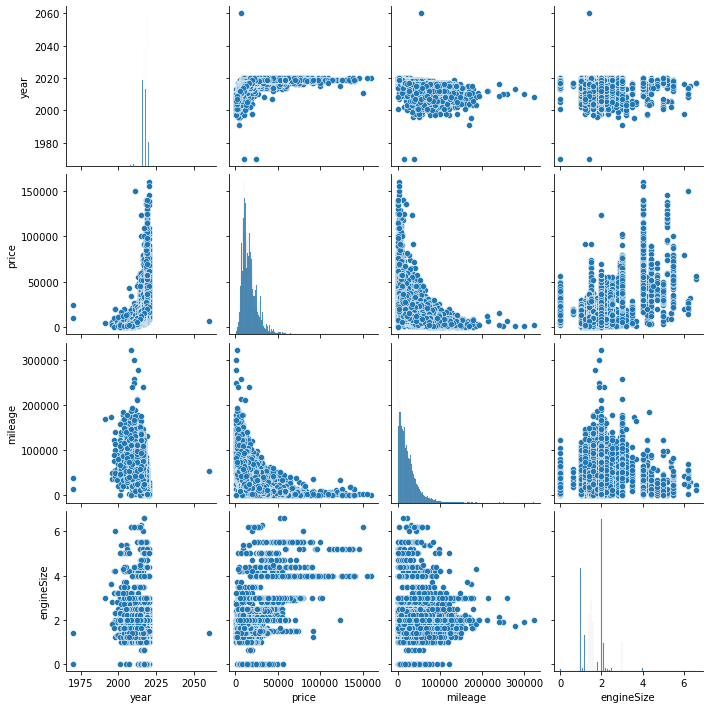

In [131]:
sns.pairplot(dados)

#### Aqui uma visão mas detalhada das correlações.
#### Uma relação maior entre o ano e o preço o que faz
#### sentido pois o preço varia com o ano.

<AxesSubplot:>

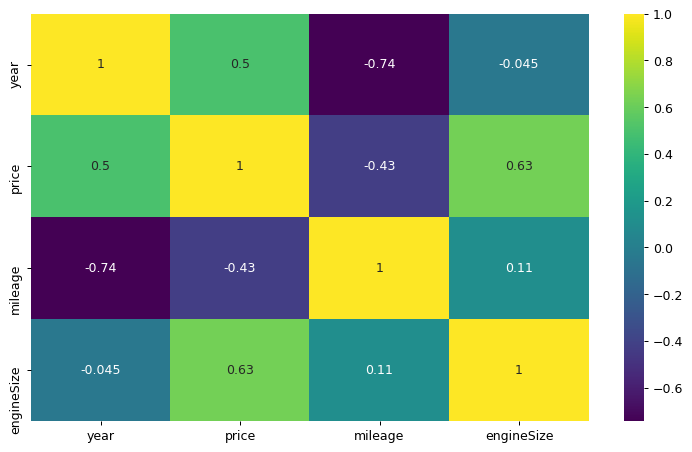

In [132]:
resizeplot(10,6,90)
sns.heatmap(dados.corr(),cmap='viridis',annot=True)

###  Vamos ver o carro mais caro.

In [133]:
df.loc[df['price'].idxmax()]

model             G Class
year                 2020
price              159999
transmission    Semi-Auto
mileage              1350
fuelType           Petrol
engineSize            4.0
Name: 59826, dtype: object

#### Aqui um comparativo de distribuição do preço e das milhas percorridas. Um pouco similares.

<AxesSubplot:xlabel='mileage', ylabel='Count'>

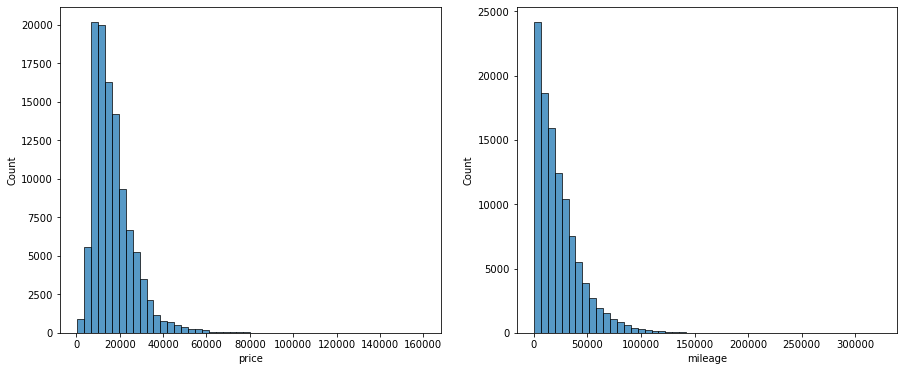

In [134]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.histplot(df['price'],ax=ax[0],bins=50)
sns.histplot(df['mileage'],ax=ax[1],bins=50)

#### Abaixo, um comparativo dos anos.

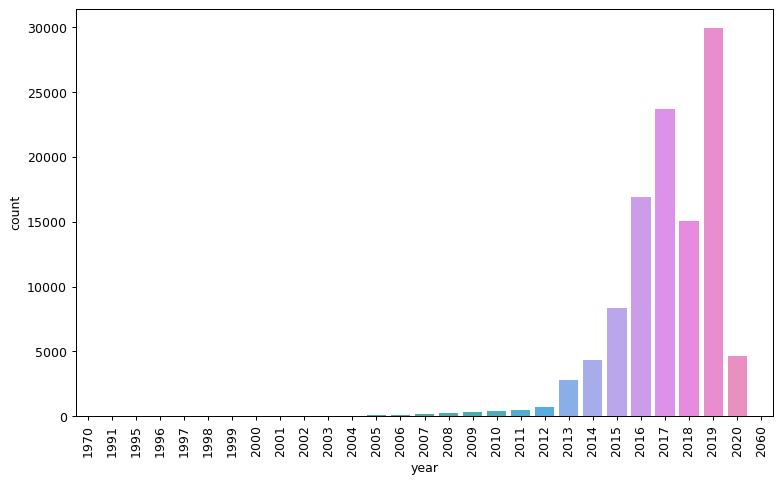

In [135]:
resizeplot(10,6,90)
sns.countplot(x='year',data=df)
plt.xticks(rotation=(90));

#### Explorando a potência dos veículos.

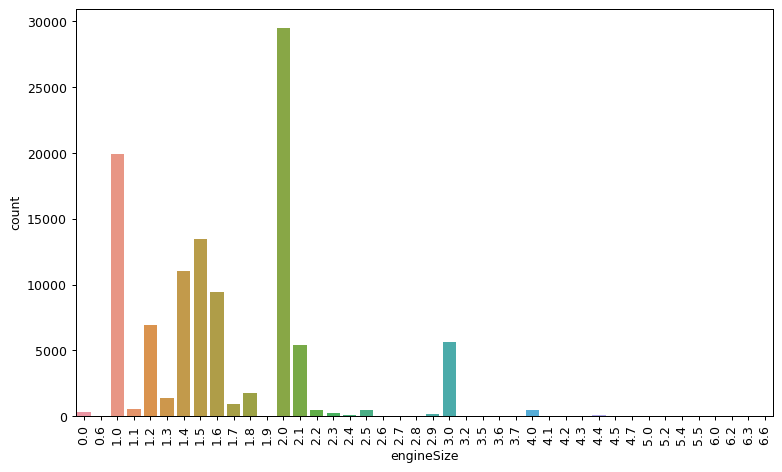

In [136]:
resizeplot(10,6,90)
sns.countplot(x=df['engineSize'])
plt.xticks(rotation=(90));

In [137]:
df[(df['engineSize']==4.0)& (df['price']>100000)]

,model,year,price,transmission,mileage,fuelType,engineSize
13753,RS6,2020,102544,Semi-Auto,2000,Petrol,4.0
15737,RS6,2020,109495,Semi-Auto,1500,Petrol,4.0
19578,RS6,2020,104948,Automatic,3000,Petrol,4.0
53635,G Class,2019,139948,Automatic,12000,Petrol,4.0
54638,A Class,2019,104999,Semi-Auto,5822,Petrol,4.0
55607,S Class,2019,109995,Semi-Auto,4688,Petrol,4.0
56256,A Class,2019,123846,Semi-Auto,2951,Petrol,4.0
56274,A Class,2019,125796,Automatic,637,Petrol,4.0
57714,S Class,2019,104590,Automatic,3671,Petrol,4.0
57721,A Class,2019,124366,Semi-Auto,880,Petrol,4.0


<AxesSubplot:xlabel='transmission', ylabel='price'>

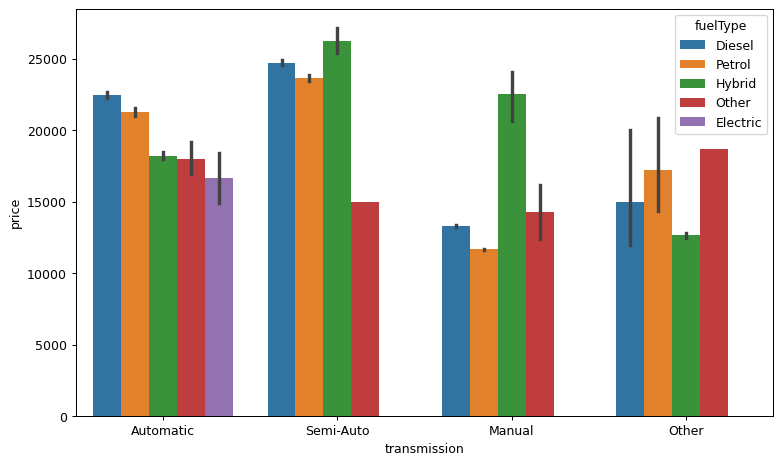

In [138]:
resizeplot(10,6,90)
sns.barplot(x='transmission',y='price',data=df,hue='fuelType')

#### Abaixo verificamos um box plot com alguns possíveis outliers. Vamos tratá-los.

<AxesSubplot:xlabel='fuelType', ylabel='price'>

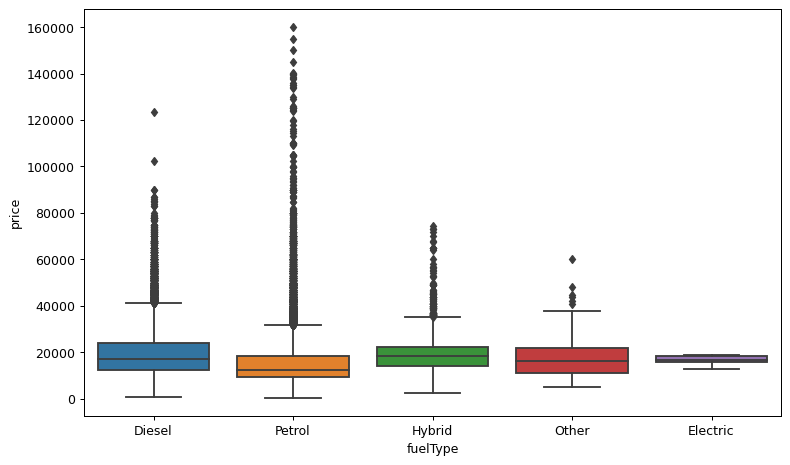

In [139]:
resizeplot(10,6,90)
sns.boxplot(x='fuelType',y='price',data=df)

In [140]:
drop_out_other = df[(df['fuelType']=='Other')&(df['price']>50000)].index

In [141]:
drop_out_hybr = df[(df['fuelType']=='Hybrid')&(df['price']>60000)].index
drop_out_dis = df[(df['fuelType']=='Diesel')&(df['price']>100000)].index

In [142]:
df = df.drop(drop_out_other,axis=0)

In [143]:
df = df.drop(drop_out_hybr,axis=0)
df = df.drop(drop_out_dis,axis=0)

In [144]:
df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [145]:
df['year'].unique()

array([2020, 2019, 2013, 2012, 2011, 2015, 2016, 2017, 2018, 2014, 2009,
       2007, 2010, 2008, 2005, 2006, 2002, 1991, 1995, 2004, 2003, 1998,
       1997, 2001, 2000, 1999, 1996, 2060, 1970])

<Figure size 900x540 with 0 Axes>

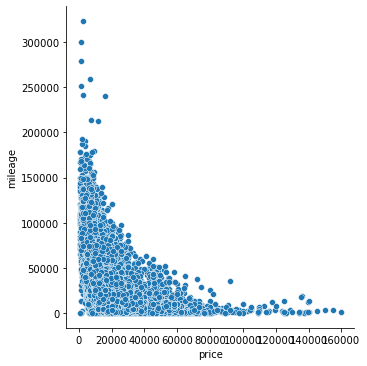

In [146]:
resizeplot(10,6,90)
sns.relplot(x='price',y='mileage',data=df)

#### Categorizamos algumas features para o treinamento dos modelos.

In [154]:
df = pd.get_dummies(df,columns=['transmission','fuelType'])

In [155]:
df.head()

,model,year,price,mileage,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,C Class,2020,30495,1200,2.0,1,0,0,0,1,0,0,0,0
1,C Class,2020,29989,1000,1.5,1,0,0,0,0,0,0,0,1
2,C Class,2020,37899,500,2.0,1,0,0,0,1,0,0,0,0
3,C Class,2019,30399,5000,2.0,1,0,0,0,1,0,0,0,0
4,C Class,2019,29899,4500,2.0,1,0,0,0,1,0,0,0,0


In [178]:
X = df.drop(['model','price'],axis=1).values
y=df['price'].values

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [180]:
scaler = StandardScaler()

In [192]:
scaler.fit(X_train)

StandardScaler()

In [193]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [194]:
#CRIANDO OS MODELOS

In [195]:
# ELASTIC NET

In [196]:
model_elastic = ElasticNet()
param_grid_en = {'alpha':[0.1,1,5,10,100,200],'l1_ratio':[.1,.7,.99,1]}
grid_model_en = GridSearchCV(model_elastic,param_grid = param_grid_en,scoring='neg_mean_squared_error',
                            cv=5,verbose=2,n_jobs=-1)

In [197]:
grid_model_en.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 5, 10, 100, 200],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [198]:
y_pred_en = grid_model_en.predict(X_test)

In [199]:
mae_en = mean_absolute_error(y_test,y_pred_en)
mse_en = mean_squared_error(y_test,y_pred_en)
rmse_en = np.sqrt(mse_en)
score_en = r2_score(y_test,y_pred_en)

print('Score: ',score_en)
print('\n')
print('Mae: ', mae_en)
print('Mse: ',mse_en)
print('Rmse: ', rmse_en)

Score:  0.7332021318157677


Mae:  3358.3550484350444
Mse:  25063380.438410003
Rmse:  5006.334031845059


In [ ]:
#RANDOM FOREST REGRESSOR

In [234]:
rfr = RandomForestRegressor()
param_grid_rfr = {'n_estimators':[150],'criterion':['mae'],'max_depth':[15],
                  'max_features':['auto', 'sqrt', 'log2']}
grid_rfr = GridSearchCV(rfr,param_grid_rfr,n_jobs=-1,cv=2)
grid_rfr.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae'], 'max_depth': [15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [150]})

In [235]:
grid_rfr.best_params_

{'criterion': 'mae',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 150}

In [236]:
y_pred_rfr = grid_rfr.predict(X_test)

score_rfr = r2_score(y_test,y_pred_rfr)

mae_rfr = mean_absolute_error(y_test,y_pred_rfr)
mse_rfr = mean_squared_error(y_test,y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)

print('Mean Absolute_error: ', mae_rfr)
print('Mean_Squared_Error: ', mse_rfr)
print('Root_Mean_Squared_Error: ', rmse_rfr)
print('\n')
print('Score_R2_js: ', score_rfr)

Mean Absolute_error:  2453.892875688515
Mean_Squared_Error:  14534168.374042956
Root_Mean_Squared_Error:  3812.3704402960316


Score_R2_js:  0.8452848310883578


In [ ]:
#DECISION TREE REGRESSOR

In [231]:
dtr = DecisionTreeRegressor()
param_dtr_grid = {'criterion':['mse','friedman_mse', 'mae', 'poisson'],
                  'splitter':['best'],'max_features':['auto', 'sqrt', 'log2']}
grid_dtr = GridSearchCV(dtr,param_grid=param_dtr_grid,n_jobs=-1,cv=3)
grid_dtr.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best']})

In [232]:
grid_dtr.best_params_

{'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'}

In [233]:
pred_dtr = grid_dtr.predict(X_test)

mae_dtr = mean_absolute_error(y_test,pred_dtr)
mse_dtr = mean_squared_error(y_test,pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

score_dtr = r2_score(y_test,pred_dtr)

print('Score_knnr: ',score_dtr)
print('\n')
print('Mean_Absolute_error: ',mae_dtr)
print('Mean_Squared_Error: ',mse_dtr)
print('Root_Mean_Squared_Error: ',rmse_dtr)

Score_knnr:  0.7520316222040019


Mean_Absolute_error:  2978.076608598039
Mean_Squared_Error:  23294510.678416964
Root_Mean_Squared_Error:  4826.438715908134


In [222]:
#KNN REGRESSOR

In [225]:
knnr = KNeighborsRegressor()
param_knn_grid = {'n_neighbors':[5,15,20],'leaf_size':[100,200],
                  'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knnr = GridSearchCV(knnr,param_knn_grid,n_jobs=-1,cv=3)
grid_knnr.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [100, 200], 'n_neighbors': [5, 15, 20]})

In [226]:
grid_knnr.best_params_

{'algorithm': 'auto', 'leaf_size': 100, 'n_neighbors': 20}

In [227]:
pred_knnr = grid_knnr.predict(X_test)

mae_knr = mean_absolute_error(y_test,pred_knnr)
mse_knr = mean_squared_error(y_test,pred_knnr)
rmse_knr = np.sqrt(mse_knr)

score_knr = r2_score(y_test,pred_knnr)

print('Score_knnr: ',score_knr)
print('\n')
print('Mean_Absolute_error: ',mae_knr)
print('Mean_Squared_Error: ',mse_knr)
print('Root_Mean_Squared_Error: ',rmse_knr)

Score_knnr:  0.8395447042139054


Mean_Absolute_error:  2545.0845475766323
Mean_Squared_Error:  15073404.25549235
Root_Mean_Squared_Error:  3882.4482295959015


In [200]:
#XGBOOST

In [206]:
xgb = XGBRegressor()

In [213]:
kfold = KFold(n_splits=5, shuffle=True)
param_grid_x = {'n_estimators':[100,200,300],'eval_metric':['mae'],'max_depth':[2,4,6]}
grid_xgb = GridSearchCV(xgb,param_grid_x,n_jobs=-1,cv=kfold,verbose=2)

In [214]:
grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                  

In [215]:
grid_xgb.best_params_

{'eval_metric': 'mae', 'max_depth': 4, 'n_estimators': 300}

In [216]:
pred_xgb = grid_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test,pred_xgb)
mse_xgb = mean_squared_error(y_test,pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
score_xgb = r2_score(y_test,pred_xgb)

print('Score: ',score_xgb)
print('\n')
print('Mean_Absolute_error: ',mae_xgb)
print('Mean_Squared_Error: ',mse_xgb)
print('Root_Mean_Squared_Error: ',rmse_xgb)

Score:  0.84768166386699


Mean_Absolute_error:  2503.5807228924946
Mean_Squared_Error:  14309006.410842324
Root_Mean_Squared_Error:  3782.724733686331


#### Este algorítmo apresentou o melhor score.
#### Abaixo uma representação da distribuição das predições.

<AxesSubplot:ylabel='Count'>

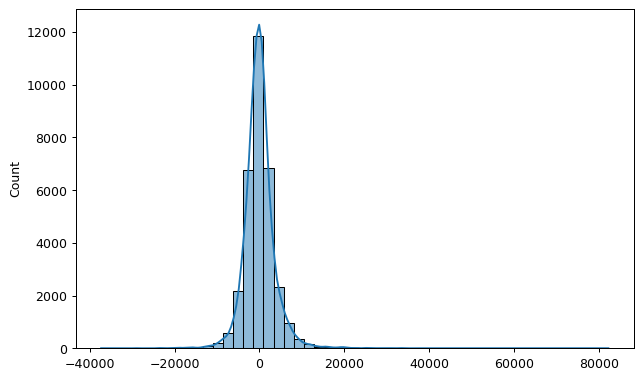

In [260]:
resizeplot(8,5,90)
sns.histplot((y_test-pred_xgb),bins=50,kde=True)

#### Agora vamos aplicar em todo o conjunto de dados.

In [251]:
xgb_final = XGBRegressor(eval_metric= 'mae', max_depth= 4, n_estimators= 300)
xgb_final.fit(X,y)
pred_xgb_final = xgb_final.predict(X)

In [252]:
df['predicted_prices'] = pred_xgb_final

In [254]:
df['price_difference'] = df['price']-df['predicted_prices']

In [256]:
df.columns

Index(['model', 'year', 'price', 'mileage', 'engineSize',
       'transmission_Automatic', 'transmission_Manual', 'transmission_Other',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol',
       'predicted_prices', 'price_difference'],
      dtype='object')

#### Reorganizando as colunas.

In [257]:
df = df.reindex(columns=['model', 'year', 'mileage', 'engineSize',
                         'transmission_Automatic', 'transmission_Manual',
                         'transmission_Other','transmission_Semi-Auto',
                         'fuelType_Diesel', 'fuelType_Electric',
                         'fuelType_Hybrid', 'fuelType_Other',
                         'fuelType_Petrol','price','predicted_prices', 'price_difference'])

In [258]:
df.head()

,model,year,mileage,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price,predicted_prices,price_difference
0,C Class,2020,1200,2.0,1,0,0,0,1,0,0,0,0,30495,32431.710938,-1936.710938
1,C Class,2020,1000,1.5,1,0,0,0,0,0,0,0,1,29989,26578.394531,3410.605469
2,C Class,2020,500,2.0,1,0,0,0,1,0,0,0,0,37899,32767.263672,5131.736328
3,C Class,2019,5000,2.0,1,0,0,0,1,0,0,0,0,30399,29486.666016,912.333984
4,C Class,2019,4500,2.0,1,0,0,0,1,0,0,0,0,29899,29539.373047,359.626953


#### No final temos as novas colunas de preços previstos e a diferença entre os preços e as previsões.
#### Não tivemos uma diferença muito grande, cabendo ao time de negócios a melhor solução para as negociações.